<a href="https://colab.research.google.com/github/Jaqueline-Esposito/Data-Science/blob/main/Automa%C3%A7%C3%A3o_e_An%C3%A1lise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AUTOMAÇÃO E ANÁLISE DE DADOS EM LINGUAGEM *PYTHON***

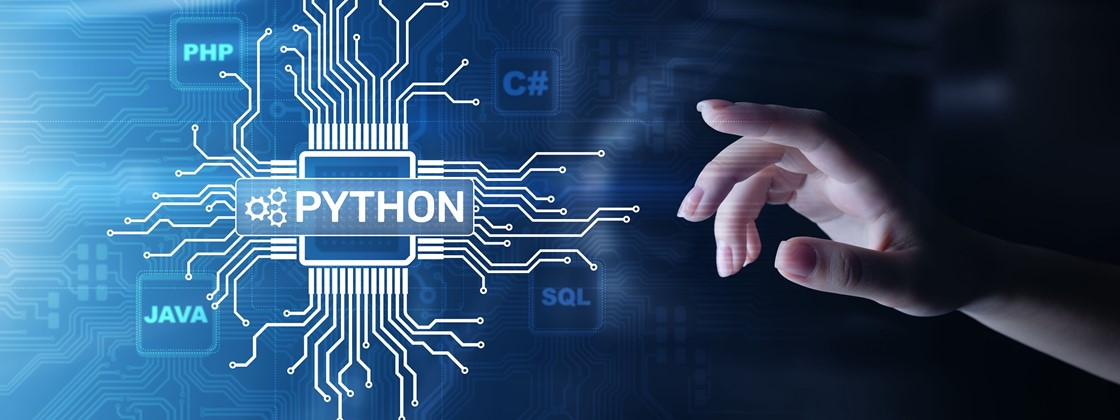

O *Python* é  uma dentre tantas outras linguagens de programação, sendo utilizada na comunicação com computadores, facilitando a automatização de tarefas e análise de grande volume de dados, podendo ser utilizada nas seguintes áreas: 

*  Data Science
*  Automação de Processos
*  Desenvolvimento de Sites
*  AI (Inteligência Artificial)

Assim, com base em códigos (passo a passo que o computador deve fazer) vamos importar uma tabela de dados e fazer a análise, otimizando o tempo da tarefa e extraindo insights, tornando o processo mais eficiente.




**1. SITUAÇÃO PROBLEMA**

Você trabalha em uma empresa de telecom e tem clientes de vários serviços diferentes, entre os principais: internet e telefone.

O problema é que, analisando o histórico dos clientes dos últimos anos, você percebeu que a empresa está com Churn (métrica que indica o quanto a empresa perdeu de receita) de mais de 26% dos clientes.

Isso representa uma perda de milhões para a empresa.

O que a empresa precisa fazer para resolver isso?

Utilizando um modelo de arquivo .csv e gráficos do *Python* vamos realizar uma análise exploratória e identificar as possíveis soluções.













**2. IMPORTANDO DADOS UTILIZANDO O *PANDAS***

O *Python* por si só possui uma série de funcionalidades, entretanto, por se tratar de código aberto (código que pode ser baixado livremente e modifficado) foram criadas bibliotecas para o auxílio na elaboração dos códigos.

Para nos auxiliar na importação da base de dados, vamos importar o *pandas*, uma das bibliotecas do *Python*.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


Aqui importamos a biblioteca *pandas* e baixamos a tabela *telecom_users.csv* do drive.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/telecom_users.csv')
display(df)

,Unnamed: 0,IDCliente,Genero,Aposentado,Casado,Dependentes,MesesComoCliente,ServicoTelefone,MultiplasLinhas,ServicoInternet,ServicoSegurancaOnline,ServicoBackupOnline,ProtecaoEquipamento,ServicoSuporteTecnico,ServicoStreamingTV,ServicoFilmes,TipoContrato,FaturaDigital,FormaPagamento,ValorMensal,TotalGasto,Churn,Codigo
0,1869,7010-BRBUU,Masculino,0,Sim,Sim,72,Sim,Sim,Nao,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,2 anos,Nao,CartaoCredito,24.10,1734.65,Nao,NaN
1,4528,9688-YGXVR,Feminino,0,Nao,Nao,44,Sim,Nao,Fibra,Nao,Sim,Sim,Nao,Sim,Nao,Mensal,Sim,CartaoCredito,88.15,3973.2,Nao,NaN
2,6344,9286-DOJGF,Feminino,1,Sim,Nao,38,Sim,Sim,Fibra,Nao,Nao,Nao,Nao,Nao,Nao,Mensal,Sim,DebitoAutomatico,74.95,2869.85,Sim,NaN
3,6739,6994-KERXL,Masculino,0,Nao,Nao,4,Sim,Nao,DSL,Nao,Nao,Nao,Nao,Nao,Sim,Mensal,Sim,BoletoEletronico,55.90,238.5,Nao,NaN
4,432,2181-UAESM,Masculino,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,Mensal,Nao,BoletoEletronico,53.45,119.5,Nao,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Masculino,0,Sim,Nao,1,Sim,Nao,Fibra,Sim,Nao,Nao,Nao,Sim,Sim,Mensal,Sim,BoletoEletronico,95.00,95,Sim,NaN
5982,5191,5982-PSMKW,Feminino,0,Sim,Sim,23,Sim,Sim,DSL,Sim,Sim,Sim,Sim,Sim,Sim,2 anos,Sim,CartaoCredito,91.10,2198.3,Nao,NaN
5983,5226,8044-BGWPI,Masculino,0,Sim,Sim,12,Sim,Nao,Nao,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,Mensal,Sim,BoletoEletronico,21.15,306.05,Nao,NaN
5984,5390,7450-NWRTR,Masculino,1,Nao,Nao,12,Sim,Sim,Fibra,Nao,Nao,Sim,Nao,Sim,Sim,Mensal,Sim,BoletoEletronico,99.45,1200.15,Sim,NaN


Após a análise da tabela, verificamos que uma das colunas a *Unnamed* não traz qualquer informação importante, sendo assim vamos excluí-la.

In [ ]:
df = df.drop(["Unnamed: 0"], axis=1)
display(df)

,IDCliente,Genero,Aposentado,Casado,Dependentes,MesesComoCliente,ServicoTelefone,MultiplasLinhas,ServicoInternet,ServicoSegurancaOnline,ServicoBackupOnline,ProtecaoEquipamento,ServicoSuporteTecnico,ServicoStreamingTV,ServicoFilmes,TipoContrato,FaturaDigital,FormaPagamento,ValorMensal,TotalGasto,Churn,Codigo
0,7010-BRBUU,Masculino,0,Sim,Sim,72,Sim,Sim,Nao,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,2 anos,Nao,CartaoCredito,24.10,1734.65,Nao,NaN
1,9688-YGXVR,Feminino,0,Nao,Nao,44,Sim,Nao,Fibra,Nao,Sim,Sim,Nao,Sim,Nao,Mensal,Sim,CartaoCredito,88.15,3973.2,Nao,NaN
2,9286-DOJGF,Feminino,1,Sim,Nao,38,Sim,Sim,Fibra,Nao,Nao,Nao,Nao,Nao,Nao,Mensal,Sim,DebitoAutomatico,74.95,2869.85,Sim,NaN
3,6994-KERXL,Masculino,0,Nao,Nao,4,Sim,Nao,DSL,Nao,Nao,Nao,Nao,Nao,Sim,Mensal,Sim,BoletoEletronico,55.90,238.5,Nao,NaN
4,2181-UAESM,Masculino,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,Mensal,Nao,BoletoEletronico,53.45,119.5,Nao,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0684-AOSIH,Masculino,0,Sim,Nao,1,Sim,Nao,Fibra,Sim,Nao,Nao,Nao,Sim,Sim,Mensal,Sim,BoletoEletronico,95.00,95,Sim,NaN
5982,5982-PSMKW,Feminino,0,Sim,Sim,23,Sim,Sim,DSL,Sim,Sim,Sim,Sim,Sim,Sim,2 anos,Sim,CartaoCredito,91.10,2198.3,Nao,NaN
5983,8044-BGWPI,Masculino,0,Sim,Sim,12,Sim,Nao,Nao,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,Mensal,Sim,BoletoEletronico,21.15,306.05,Nao,NaN
5984,7450-NWRTR,Masculino,1,Nao,Nao,12,Sim,Sim,Fibra,Nao,Nao,Sim,Nao,Sim,Sim,Mensal,Sim,BoletoEletronico,99.45,1200.15,Sim,NaN


**TRATAMENTO DE DADOS**

É comum que base de dados contenham dados faltantes, nulos ou incorretos, sendo que todos esses dados influenciam de certa forma na análise das informações.

Imagine um caso genérico em que preciso calcular quantos dos meus clientes possuem serviço de internet. Caso existam dados faltantes na coluna InternetService, meu cálculo de porcentagem será
afetado diretamente.

Assim, é sempre importante antes de qualquer análise avaliar se precisamos tratar esta base de dados ou não. Analisando nossa base conseguimos perceber que
temos 2 problemas:

• Dados faltantes na coluna Código

• Coluna TotalGasto está classificada como *object* e por se tratar de números, deveriam ser classificadas como tal.


In [ ]:
# transformar coluna que deveria ser número e está como texto em número
df["TotalGasto"] = pd.to_numeric(df["TotalGasto"], errors="coerce")

# remover a coluna que está 100% vazia
df = df.dropna(how='all', axis=1)

# remover a linha que tem um item vazio
df = df.dropna()

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5974 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IDCliente               5974 non-null   object 
 1   Genero                  5974 non-null   object 
 2   Aposentado              5974 non-null   int64  
 3   Casado                  5974 non-null   object 
 4   Dependentes             5974 non-null   object 
 5   MesesComoCliente        5974 non-null   int64  
 6   ServicoTelefone         5974 non-null   object 
 7   MultiplasLinhas         5974 non-null   object 
 8   ServicoInternet         5974 non-null   object 
 9   ServicoSegurancaOnline  5974 non-null   object 
 10  ServicoBackupOnline     5974 non-null   object 
 11  ProtecaoEquipamento     5974 non-null   object 
 12  ServicoSuporteTecnico   5974 non-null   object 
 13  ServicoStreamingTV      5974 non-null   object 
 14  ServicoFilmes           5974 non-null   

Acima transformamos a coluna TotalGasto (coluna de texto) em coluna de números e removemos linhas e a coluna Código que estavam vazias.

**3. ANALISANDO OS DADOS**

Analisando os dados acima, observamos que há um alto índice de cancelamento de contratos, ou seja, há alto índice de *Churn*. 

Então, vamos agora entender os principais motivos que levam a ocorrência de *Churns*, verificando o número de cancelamentos e a porcentagem, para assim gerar um plano de ação.


In [ ]:
display(df['Churn'].value_counts())
display(df['Churn'].value_counts(normalize=True).map('{:.1%}'.format))

Nao    4387
Sim    1587
Name: Churn, dtype: int64

Nao    73.4%
Sim    26.6%
Name: Churn, dtype: object

Após o código, é de se observar que 4.387 clientes não cancelaram o contrato, ou seja, 73.4% dos contratos ainda estão ativos e que 1.587 cancelaram, apresentando uma porcentagem de 26.6%.

Vamos demonstrar com mais clareza esses valores através de gráficos utilizando a biblioteca *ploty.express*.

In [ ]:
import plotly.express as px

# para edições nos gráficos: https://plotly.com/python/histograms/

for coluna in df:
if coluna != "IDCliente":
# criar a figura
fig = px.histogram(df, x=coluna, color="Churn")
# exibir a figura
fig.show()
display(df.pivot_table(index="Churn", columns=coluna, aggfunc='count')["IDCliente"])
    

Genero,Feminino,Masculino
Churn,,
Nao,2140,2247
Sim,791,796


Aposentado,0,1
Churn,,
Nao,3823,564
Sim,1185,402


Casado,Nao,Sim
Churn,,
Nao,2069,2318
Sim,1011,576


Dependentes,Nao,Sim
Churn,,
Nao,2888,1499
Sim,1306,281


MesesComoCliente,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Nao,192,90,87,81,59,62,70,73,60,63,58,64,57,43,55,46,54,65,48,47,40,53,53,61,50,54,55,38,48,47,41,48,44,45,61,34,44,39,33,41,47,44,47,42,42,49,51,45,42,49,55,56,44,43,47,58,52,51,44,60,54,61,60,68,56,63,73,81,69,80,147,304
Sim,318,104,82,73,52,36,41,37,37,39,27,33,29,20,28,24,19,18,16,16,14,23,12,18,19,12,12,11,14,13,15,17,12,10,13,9,12,10,11,13,12,13,15,5,5,12,11,9,13,9,8,6,13,12,8,10,7,10,8,5,6,5,2,3,9,11,8,8,6,10,5,4


ServicoTelefone,Nao,Sim
Churn,,
Nao,439,3948
Sim,149,1438


MultiplasLinhas,Nao,SemTelefone,Sim
Churn,,,
Nao,2127,439,1821
Sim,715,149,723


ServicoInternet,DSL,Fibra,Nao
Churn,,,
Nao,1666,1536,1185
Sim,397,1091,99


ServicoSegurancaOnline,Nao,SemInternet,Sim
Churn,,,
Nao,1740,1185,1462
Sim,1242,99,246


ServicoBackupOnline,Nao,SemInternet,Sim
Churn,,,
Nao,1566,1185,1636
Sim,1038,99,450


ProtecaoEquipamento,Nao,SemInternet,Sim
Churn,,,
Nao,1608,1185,1594
Sim,1031,99,457


ServicoSuporteTecnico,Nao,SemInternet,Sim
Churn,,,
Nao,1737,1185,1465
Sim,1222,99,266


ServicoStreamingTV,Nao,SemInternet,Sim
Churn,,,
Nao,1589,1185,1613
Sim,799,99,689


ServicoFilmes,Nao,SemInternet,Sim
Churn,,,
Nao,1561,1185,1641
Sim,792,99,696


TipoContrato,2 anos,Anual,Mensal
Churn,,,
Nao,1389,1127,1871
Sim,41,148,1398


FaturaDigital,Nao,Sim
Churn,,
Nao,2045,2342
Sim,406,1181


FormaPagamento,BoletoEletronico,BoletoImpresso,CartaoCredito,DebitoAutomatico
Churn,,,,
Nao,1104,1098,1104,1081
Sim,902,263,198,224


ValorMensal,18.25,18.40,18.55,18.70,18.75,18.80,18.85,18.90,18.95,19.00,19.05,19.10,19.15,19.20,19.25,19.30,19.35,19.40,19.45,19.50,19.55,19.60,19.65,19.70,19.75,19.80,19.85,19.90,19.95,20.00,20.05,20.10,20.15,20.20,20.25,20.30,20.35,20.40,20.45,20.50,...,114.90,114.95,115.00,115.05,115.10,115.15,115.25,115.50,115.55,115.60,115.65,115.75,115.80,115.85,116.00,116.05,116.10,116.15,116.20,116.25,116.30,116.40,116.45,116.50,116.55,116.60,116.75,116.80,116.85,116.95,117.15,117.35,117.45,117.60,117.80,118.20,118.35,118.60,118.65,118.75
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Nao,1.0,1.0,1.0,1.0,1.0,6.0,3.0,2.0,4.0,6.0,9.0,11.0,10.0,16.0,12.0,18.0,22.0,21.0,19.0,25.0,35.0,29.0,31.0,36.0,27.0,33.0,34.0,29.0,33.0,28.0,48.0,30.0,26.0,24.0,29.0,23.0,29.0,22.0,23.0,22.0,...,2.0,1.0,1.0,4.0,3.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,4.0,1.0,1.0,2.0,1.0,1.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,2.0,1.0,1.0
Sim,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,3.0,3.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,2.0,6.0,1.0,5.0,3.0,3.0,2.0,2.0,3.0,4.0,6.0,4.0,1.0,3.0,1.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN


TotalGasto,18.80,18.85,18.90,19.00,19.05,19.10,19.15,19.20,19.25,19.30,19.40,19.45,19.50,19.55,19.60,19.65,19.70,19.75,19.80,19.85,19.90,19.95,20.05,20.10,20.15,20.20,20.25,20.30,20.35,20.40,20.45,20.50,20.55,20.60,20.65,20.70,20.80,20.85,20.90,20.95,...,8196.40,8220.40,8240.85,8244.30,8248.50,8277.05,8289.20,8306.05,8308.90,8309.55,8310.55,8312.40,8312.75,8317.95,8331.95,8332.15,8333.95,8337.45,8349.45,8349.70,8375.05,8399.15,8404.90,8405.00,8424.90,8425.15,8425.30,8436.25,8456.75,8476.50,8477.60,8477.70,8496.70,8529.50,8543.25,8547.15,8564.75,8594.40,8672.45,8684.80
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Nao,1.0,1.0,1.0,1.0,1.0,2.0,1.0,4.0,2.0,2.0,3.0,1.0,1.0,6.0,NaN,3.0,1.0,6.0,1.0,2.0,3.0,NaN,4.0,NaN,2.0,4.0,3.0,4.0,2.0,3.0,4.0,1.0,1.0,1.0,2.0,1.0,1.0,NaN,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
Sim,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,2.0,NaN,2.0,1.0,1.0,2.0,2.0,1.0,2.0,NaN,1.0,3.0,2.0,2.0,2.0,2.0,6.0,2.0,1.0,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


Churn,Nao,Sim
Churn,,
Nao,4387.0,NaN
Sim,NaN,1587.0


**CONCLUSÕES E POSSÍVEIS SOLUÇÕES**

Ao analisar o gráfico dos meses em que os clientes contrataram o produto e/ou serviço, observamos que nos meses iniciais há um número considerável de desistências (*churns*), desistências essas que levam a empresa a se perguntar porque os clientes estão cancelando o contrato logo no início da aquisição do produto e/ou serviço.

Pode se considerar os motivos abaixo:

* Qualidade do atendimento deficiente;
* Insatisfação com o produto e/ou serviço;
* Desvantagens na aquisição pós venda;
* Concorrência vantajosa de produto e/ou outro serviço e etc...

Como solução a empresa poderia qualificar os seus atendentes e apresentar melhorias no produto e/ou serviço para chamar a atenção dos seus consumidores.

Já em relação à forma de pagamento, verificamos que a opção boleto eletrônico tem causado certa negatividade nos clientes, tendo alto índice de *churn*, compensando para a empresa investir nas outras opções existentes no mercado para a forma de pagamento de seus produtos e/ou serviços.

Exemplos:

*  Cartão de crédito;
*  Débito automático;
*  Boleto impresso.

Além disso, como forma de chamar a atenção do cliente para a empresa, o fornecimento de bônus ou alguma outra vantagem ligada a forma de pagamento faria com que os clientes optassem pela melhor forma e assim também daria segurança para a empresa no recebimento.

Por fim, os contratos mensais também apresentam alto índice de *churn*, demonstrando juntamento com os gráficos de Serviços de Suporte Técnico, Proteção para Equipamentos, Serviço de Backup Online, Serviço de Segurança Online, que os clientes que não adquiriram esses serviços tem a tendência de cancelarem os contratos, já que não veem vantagens a mais.

Entretanto, a empresa pode tomar como solução a implementação de planos completos com linha de custo acessível a todos os tipos de clientes, fazendo com que haja uma diminuição de *churns*, transmitindo confiabilidade e fidelidade para com os clientes.